## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections:
    * [MNIST Data](#MNIST-Data)
    * [Convolutional Neural Network Model](#Convolutional-Neural-Network-Model)
    * [Train Model](#Train-Model)
    * [Validation](#Validation)
0. Complete the [Exercise](#Exercise)

In [71]:
# allow matplotlib graphics to display in the notebook
%matplotlib inline
import matplotlib.pyplot

# import numpy, for image dimension manipulation
import numpy

# import validation methods from scikit-learn
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# import the dataset and neural network layers from keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical

## MNIST Data
[MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a famous dataset of images of handwritten numbers. The goal is to be able to figure out which number is in the image.

In [2]:
# constants to describe the MNIST images
NUM_ROWS = 28 
NUM_COLUMNS = 28
NUM_COLORS = 1
IMG_SHAPE = (NUM_ROWS, NUM_COLUMNS, NUM_COLORS)

# constant to describe the MNIST output labels
# there are ten different numbers, 0-9
NUM_CLASSES = 10

In [3]:
# load the data
((images_train, labels_train), (images_test, labels_test)) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Let's take a look at one particular image and its label, to better understand the dataset.

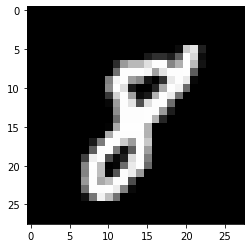

In [4]:
matplotlib.pyplot.imshow(images_train[17], cmap='gray')

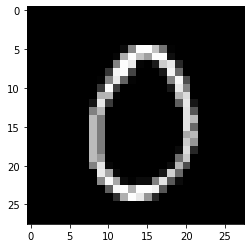

In [11]:
matplotlib.pyplot.imshow(images_train[210], cmap='gray')

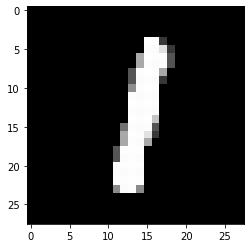

In [12]:
matplotlib.pyplot.imshow(images_train[211], cmap='gray')

2


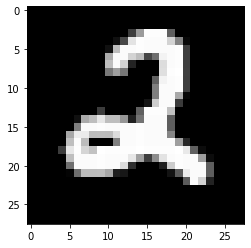

In [27]:
print(labels_train[213])
matplotlib.pyplot.imshow(images_train[213], cmap='gray')

In [32]:
model.predict(numpy.expand_dims(images_train[213], axis=3))

AxisError: axis 3 is out of bounds for array of dimension 3

In [29]:
labels_train[12345]

3

## Convolutional Neural Network Model

In [35]:
model = Sequential()

# convolutional layers
model.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=8, kernel_size=3, strides=2, padding='same'))
model.add(Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))

# dense layers to consolidate information
model.add(Flatten())
model.add(Dense(units=8, activation='tanh'))

# output layer to make the final decision on which number it is
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

## Train Model

In [36]:
# keras requires a color dimension, so we need to expand each image to have one
images_3d_train = numpy.expand_dims(images_train, axis=3)

# the labels need to be one-hot encoded, to match the ten outputs of our model
labels_onehot_train = to_categorical(labels_train)

# set up the model to be ready for training
model.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model.fit(images_3d_train, labels_onehot_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8126
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5180


In [37]:
model.fit(images_3d_train, labels_onehot_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6764
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7094
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7529
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8133
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0051A: 0s - loss: 2.0
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9998


## Validation

In [38]:
# keras requires a color dimension, so we need to expand each image to have one
images_3d_test = numpy.expand_dims(images_test, axis=3)

# get the predictions from the model
predictions_test_onehot = model.predict(images_3d_test)

# get the index that has the highest probability
predictions_test = numpy.argmax(predictions_test_onehot, axis=1)

In [39]:
# get the overall accuracy
accuracy_score(y_true=labels_test, y_pred=predictions_test)

0.216

In [40]:
# get precision, recall, f-score, and number of examples of each digit
# can you see which digits are easiest for the model, and which are hardest?
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test)

(array([0.241033  , 0.        , 0.29274005, 0.65789474, 0.22222222,
        0.        , 0.04878049, 0.17734959, 0.        , 0.58333333]),
 array([0.85714286, 0.        , 0.36337209, 0.02475248, 0.00203666,
        0.        , 0.00208768, 0.87743191, 0.        , 0.01387512]),
 array([0.3762598 , 0.        , 0.32425422, 0.04770992, 0.00403633,
        0.        , 0.004004  , 0.29506052, 0.        , 0.02710552]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

## Exercise

Can you get the model to perform better? Try adding more layers, or taking them away. 
Take a look at the documentation for the [convolutional](https://keras.io/layers/convolutional/) and [dense](https://keras.io/layers/core/) layers and the [sequential model](https://keras.io/models/sequential/) to understand the options that you have and try out different things.

It might also be a good idea to find examples posted online of networks that did well with MNIST and try out some of the configuration they used. Make sure you cite any sources you use!

Take notes of what performance you get from different configurations.

Comment on what patterns you observed in terms of what changes helped your model.

For this model I tried adding more filters, more layers, and more units.

In [48]:
model2 = Sequential()

# convolutional layers
model2.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=32, kernel_size=3, strides=2, padding='same'))
model2.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same'))
model2.add(Conv2D(filters=8, kernel_size=2, strides=1, padding='same'))

# dense layers to consolidate information
model2.add(Flatten())
model2.add(Dense(units=20, activation='tanh'))
model2.add(Dense(units=20, activation='tanh'))
model2.add(Dense(units=20, activation='tanh'))
model2.add(Dense(units=20, activation='tanh'))

# output layer to make the final decision on which number it is
model2.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [49]:
model2.compile(optimizer=SGD(), loss='mean_squared_error')

# fit the model to the training data
model2.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0844
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0753
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0478
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0433
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0359
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332


In [50]:
predictions_test_onehot2 = model2.predict(images_3d_test)

# get the index that has the highest probability
predictions_test2 = numpy.argmax(predictions_test_onehot2, axis=1)

In [51]:
accuracy_score(y_true=labels_test, y_pred=predictions_test2)

0.8117

In [56]:
# get precision, recall, f-score, and number of examples of each digit
# can you see which digits are easiest for the model, and which are hardest?
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test2)

(array([0.80120482, 0.94214162, 0.86419753, 0.64868805, 0.75421473,
        0.92253521, 0.89017951, 0.86239397, 0.75235405, 0.82948847]),
 array([0.95      , 0.96123348, 0.81395349, 0.88118812, 0.86558045,
        0.14686099, 0.87995825, 0.89007782, 0.82032854, 0.81962339]),
 array([0.86928105, 0.9515918 , 0.83832335, 0.7472712 , 0.80606923,
        0.25338491, 0.88503937, 0.87601723, 0.7848723 , 0.82452642]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [61]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 8)           520       
_________________________________________________________________
flatten_5 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                7860      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 20)               

Decent accuracy from the new model but not great. In the next model I changed the activation function from mean_squared_error to categorical_crossentropy, and the results were absolutely awful. 13% accuracy. Something is seriously wrong.

In [54]:
model3 = Sequential()

# convolutional layers
model3.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=32, kernel_size=3, strides=2, padding='same'))
model3.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same'))
model3.add(Conv2D(filters=8, kernel_size=2, strides=1, padding='same'))

# dense layers to consolidate information
model3.add(Flatten())
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=20, activation='tanh'))

# output layer to make the final decision on which number it is
model3.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [55]:
model3.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model3.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3467
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7426
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1039
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2271
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2225
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2210
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2203
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2193
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2191
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2184


In [57]:
predictions_test_onehot3 = model3.predict(images_3d_test)

# get the index that has the highest probability
predictions_test3 = numpy.argmax(predictions_test_onehot3, axis=1)

In [58]:
accuracy_score(y_true=labels_test, y_pred=predictions_test3)

0.1361

In [59]:
# get precision, recall, f-score, and number of examples of each digit
# can you see which digits are easiest for the model, and which are hardest?
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test3)

(array([0.89367816, 0.        , 1.        , 0.        , 0.50793651,
        0.        , 0.        , 0.10607009, 0.        , 0.        ]),
 array([3.17346939e-01, 0.00000000e+00, 9.68992248e-04, 0.00000000e+00,
        3.25865580e-02, 0.00000000e+00, 0.00000000e+00, 9.89299611e-01,
        0.00000000e+00, 0.00000000e+00]),
 array([0.46837349, 0.        , 0.00193611, 0.        , 0.06124402,
        0.        , 0.        , 0.19159759, 0.        , 0.        ]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

## After talking to Brandon
He showed me how he got 91% accuracy by changing a few features: strides to 1, adding activation functions for conv layers, and maxpooling. I incorporated shorter strides + activation functions and removed dense layers and got a whopping 98%!!! Also, categorical crossentropy redeemed itself.

In [66]:
model4 = Sequential()

# convolutional layers
model4.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=32, kernel_size=3, strides=1, padding='same', activation='tanh'))
model4.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='tanh'))

# dense layers to consolidate information
model4.add(Flatten())
model4.add(Dense(units=20, activation='relu'))

# output layer to make the final decision on which number it is
model4.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [67]:
# keras requires a color dimension, so we need to expand each image to have one
#images_3d_train = numpy.expand_dims(images_train, axis=3)

# the labels need to be one-hot encoded, to match the ten outputs of our model
#labels_onehot_train = to_categorical(labels_train)

# set up the model to be ready for training
model4.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model4.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2002
Epoch 2/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0715
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0533
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0428
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0365
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0313
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0267
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0222
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0194
Epoch 10/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0160


In [162]:
model4.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0137
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0113
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0081
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0069
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0059
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0053
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0045
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0040
Epoch 10/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0035


In [165]:
predictions_test_onehot4 = model4.predict(images_3d_test)

# get the index that has the highest probability
predictions_test4 = numpy.argmax(predictions_test_onehot4, axis=1)

In [166]:
# get the overall accuracy
accuracy_score(y_true=labels_test, y_pred=predictions_test4)

0.9871

In [167]:
# get precision, recall, f-score, and number of examples of each digit
# can you see which digits are easiest for the model, and which are hardest?
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test4)

(array([0.9779338 , 0.99033392, 0.9874031 , 0.98914116, 0.9858156 ,
        0.98877666, 0.99056604, 0.98825832, 0.98654244, 0.986     ]),
 array([0.99489796, 0.99295154, 0.9874031 , 0.99207921, 0.99083503,
        0.98766816, 0.98643006, 0.98249027, 0.97843943, 0.97720515]),
 array([0.98634294, 0.991641  , 0.9874031 , 0.99060801, 0.98831894,
        0.9882221 , 0.98849372, 0.98536585, 0.98247423, 0.98158288]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [74]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 16)        4624      
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                250900    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                210       
Total params: 256,054
Trainable params: 256,054
Non-trainable params: 0
_________________________________________________________________


But hooooly that is an enormous model.

## How small can I get the model?
This attempt uses less filters and less units.

In [77]:
model5 = Sequential()

# convolutional layers
model5.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=16, kernel_size=3, strides=1, padding='same', activation='tanh'))
model5.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='tanh'))

# dense layers to consolidate information
model5.add(Flatten())
model5.add(Dense(units=10, activation='tanh'))

# output layer to make the final decision on which number it is
model5.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [78]:
model5.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model5.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5342
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1960
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1418
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1163
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0993
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0871
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0774
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0712
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0652
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0594


In [79]:
predictions_test_onehot5 = model5.predict(images_3d_test)

predictions_test5 = numpy.argmax(predictions_test_onehot5, axis=1)

In [80]:
accuracy_score(y_true=labels_test, y_pred=predictions_test5)

0.9797

In [81]:
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test5)

(array([0.97883065, 0.98601399, 0.98252427, 0.97553816, 0.98556701,
        0.98187995, 0.98526316, 0.98715415, 0.96352584, 0.97029703]),
 array([0.99081633, 0.9938326 , 0.98062016, 0.98712871, 0.97352342,
        0.97197309, 0.97703549, 0.97178988, 0.97638604, 0.97125867]),
 array([0.98478702, 0.98990785, 0.98157129, 0.98129921, 0.9795082 ,
        0.97690141, 0.98113208, 0.97941176, 0.96991331, 0.97077761]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [82]:
model5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 8)         1160      
_________________________________________________________________
flatten_10 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                62730     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
Total params: 64,160
Trainable params: 64,160
Non-trainable params: 0
_________________________________________________________________


1% less accuracy for a quarter the size is not bad. Brandon said the best he got was 96% for a 15k parameter model so my goal is to beat that. Also got a 97.9% for 106k params. But first I want to check what led to the huge model size increase.

In [86]:
model6 = Sequential()

# convolutional layers
model6.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=32, kernel_size=3, strides=1, padding='same'))
model6.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same'))

# dense layers to consolidate information
model6.add(Flatten())
model6.add(Dense(units=20, activation='relu'))

# output layer to make the final decision on which number it is
model6.add(Dense(units=NUM_CLASSES, activation='softmax'))
model6.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 16)        4624      
_________________________________________________________________
flatten_14 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 20)                250900    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                210       
Total params: 256,054
Trainable params: 256,054
Non-trainable params: 0
_________________________________________________________________


So removing activation functions doesn't change the number of parameters. That makes sense because it's not an actual variable that you're changing. That means the massive increase in parameters was from reducing the stride size

What if I try adding another filter layer but increase stride size in the first?

In [87]:
model6 = Sequential()

# convolutional layers
model6.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=16, kernel_size=3, strides=2, padding='same', activation='tanh'))
model6.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='tanh'))
model6.add(Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='tanh'))

# dense layers to consolidate information
model6.add(Flatten())
model6.add(Dense(units=10, activation='tanh'))

# output layer to make the final decision on which number it is
model6.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [88]:
model6.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model6.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7744
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2789
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1882
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1488
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1256
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1127
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0998
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0922
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0852
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0783


In [157]:
model6.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0746
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0723
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0677
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0652
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0624
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0599
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0585
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0554
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0537
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0504


In [158]:
predictions_test_onehot6 = model6.predict(images_3d_test)

# get the index that has the highest probability
predictions_test6 = numpy.argmax(predictions_test_onehot6, axis=1)

In [159]:
# get the overall accuracy
accuracy_score(y_true=labels_test, y_pred=predictions_test6)

0.9824

In [160]:
# get precision, recall, f-score, and number of examples of each digit
# can you see which digits are easiest for the model, and which are hardest?
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test6)

(array([0.98681542, 0.98943662, 0.98832685, 0.9764475 , 0.9907312 ,
        0.97760358, 0.97803347, 0.98720472, 0.97850563, 0.96954813]),
 array([0.99285714, 0.99030837, 0.98449612, 0.98514851, 0.9796334 ,
        0.97869955, 0.97599165, 0.97568093, 0.98151951, 0.97819623]),
 array([0.98982706, 0.9898723 , 0.98640777, 0.98077871, 0.98515105,
        0.97815126, 0.97701149, 0.981409  , 0.98001025, 0.97385298]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [92]:
model6.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 4)         292       
_________________________________________________________________
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_44 (Dense)             (None, 10)                110       
Total params: 9,572
Trainable params: 9,572
Non-trainable params: 0
___________________________________________________

## Wow that is insane!!!
A 9k param model at 98.2% is unbelievable.

Now for context Brandon I had been talking and competing on how efficient we could get our models, and he had one that was 2.7k params for 96.5% and so I really wanted to beat that. Here are my attempts:

In [107]:
model7 = Sequential()

# convolutional layers
model7.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=8, kernel_size=3, strides=2, activation='tanh'))
model7.add(Conv2D(filters=8, kernel_size=3, strides=1, activation='tanh'))
model7.add(Conv2D(filters=4, kernel_size=2, strides=1, activation='tanh'))

# dense layers to consolidate information
model7.add(Flatten())
model7.add(Dense(units=10, activation='tanh'))

# output layer to make the final decision on which number it is
model7.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [108]:
model7.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model7.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.8582
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3757
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2598
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2054
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1693
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1480
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1340
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1240
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1143
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1077


In [109]:
predictions_test_onehot7 = model7.predict(images_3d_test)

# get the index that has the highest probability
predictions_test7 = numpy.argmax(predictions_test_onehot7, axis=1)

In [110]:
# get the overall accuracy
accuracy_score(y_true=labels_test, y_pred=predictions_test7)

0.9691

In [111]:
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test7)

(array([0.96896897, 0.98318584, 0.94449671, 0.96108949, 0.96396396,
        0.97433036, 0.97484277, 0.97308076, 0.96991701, 0.97821577]),
 array([0.9877551 , 0.97885463, 0.97286822, 0.97821782, 0.98065173,
        0.97869955, 0.97077244, 0.94941634, 0.95995893, 0.9345887 ]),
 array([0.97827185, 0.98101545, 0.95847255, 0.96957802, 0.97223624,
        0.97651007, 0.97280335, 0.9611029 , 0.96491228, 0.95590471]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [112]:
model7.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 13, 13, 8)         80        
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 11, 11, 8)         584       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 10, 10, 4)         132       
_________________________________________________________________
flatten_19 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                4010      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
Total params: 4,916
Trainable params: 4,916
Non-trainable params: 0
___________________________________________________

Here I'm looking at different possible ways to calculate the efficiency of a model, since that was how Brandon and I were comparing models.

In [118]:
print(4916/math.log(100-96.91, 10))
print(4916/math.log(96.91, 10))

10033.503258829032
2474.8679655491565


In [124]:
4916**(100-96.91)

255317563514.63696

In [123]:
9572**(100-97.82)

477074126.80299675

In [122]:
2720**(100-96.54)

764906599485.6727

Here I finally did the max pooling that Brandon suggested, and it worked out well.

In [145]:
model8 = Sequential()

# convolutional layers
model8.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=16, kernel_size=3, strides=1, activation='tanh'))
model8.add(MaxPooling2D(pool_size=2))
model8.add(Conv2D(filters=8, kernel_size=3, strides=1, activation='tanh'))
model8.add(Conv2D(filters=4, kernel_size=3, strides=1, activation='tanh'))

# dense layers to consolidate information
model8.add(Flatten())
model8.add(Dense(units=20, activation='tanh'))

# output layer to make the final decision on which number it is
model8.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [146]:
model8.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model8.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5418
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1932
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1440
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1215
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1056
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0941
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0881
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0813
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0756
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0701


In [151]:
model8.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0673
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0647
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0622
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0588
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0577
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0578
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0540
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0519
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0496
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0490


In [152]:
predictions_test_onehot8 = model8.predict(images_3d_test)

# get the index that has the highest probability
predictions_test8 = numpy.argmax(predictions_test_onehot8, axis=1)

In [153]:
# get the overall accuracy
accuracy_score(y_true=labels_test, y_pred=predictions_test8)

0.9842

In [154]:
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test8)

(array([0.98076923, 0.98861646, 0.98158915, 0.98231827, 0.98477157,
        0.98759865, 0.98130841, 0.98627451, 0.98345398, 0.98496994]),
 array([0.98877551, 0.99471366, 0.98158915, 0.99009901, 0.98778004,
        0.98206278, 0.98643006, 0.97859922, 0.97638604, 0.97423191]),
 array([0.9847561 , 0.99165569, 0.98158915, 0.98619329, 0.98627351,
        0.98482293, 0.98386257, 0.98242188, 0.97990726, 0.9795715 ]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [155]:
model8.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 11, 11, 8)         1160      
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 9, 9, 4)           292       
_________________________________________________________________
flatten_26 (Flatten)         (None, 324)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 20)                6500      
_________________________________________________________________
dense_66 (Dense)             (None, 10)              

This is insanely efficient! I should add that Brandon had sent me a 8.3k param model with 97% accuracy, so I felt proud to say the least. After this model's success I decided to move onto the cats and dogs classification.

In [161]:
model4.save('model256k')
model5.save('model64k')
model6.save('model9k')
model7.save('model4k')
model8.save('model8k')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model256k/assets
INFO:tensorflow:Assets written to: model64k/assets
INFO:tensorflow:Assets written to: model9k/assets
INFO:tensorflow:Assets written to: model4k/assets
INFO:tensorflow:Assets written to: model8k/assets
